In [9]:
import glob
import pandas as pd

In [10]:
files = glob.glob('results/SNR/*csv')
files

['results/SNR/sub-12_ses-02_visual.csv',
 'results/SNR/sub-12_ses-01_visual.csv',
 'results/SNR/sub-05_ses-02_visual.csv',
 'results/SNR/sub-04_ses-01_visual.csv',
 'results/SNR/sub-07_ses-01_visual.csv',
 'results/SNR/sub-15_ses-01_visual.csv',
 'results/SNR/sub-13_ses-02_visual.csv',
 'results/SNR/sub-06_ses-02_visual.csv',
 'results/SNR/sub-04_ses-02_visual.csv',
 'results/SNR/sub-14_ses-01_visual.csv',
 'results/SNR/sub-13_ses-01_visual.csv',
 'results/SNR/sub-09_ses-01_visual.csv',
 'results/SNR/sub-06_ses-01_visual.csv',
 'results/SNR/sub-15_ses-02_visual.csv',
 'results/SNR/sub-08_ses-01_visual.csv',
 'results/SNR/sub-10_ses-01_visual.csv',
 'results/SNR/sub-09_ses-02_visual.csv',
 'results/SNR/sub-01_ses-01_visual.csv',
 'results/SNR/sub-05_ses-01_visual.csv',
 'results/SNR/sub-03_ses-01_visual.csv',
 'results/SNR/sub-02_ses-01_visual.csv',
 'results/SNR/sub-11_ses-01_visual.csv']

In [11]:
visual = [f for f in files if 'visual' in f]

In [12]:
visual_data = []
rest_data = []
for index in range(len(visual)):
    filepath = visual[index]
    subject = filepath.split('/')[-1].split('_')[0]
    session = filepath.split('/')[-1].split('_')[1].split('_')[0]
    df = pd.read_csv(filepath)
    df['subject'] = subject
    df['session'] = session
    visual_data.append(df)
   
   
    

In [13]:
visual_data = pd.concat(visual_data)


In [14]:
visual_data.groupby(by='Channel').describe()

SNR_dB                                                              \
         count      mean       std       min       25%       50%       75%   
Channel                                                                      
PO3       22.0  3.303972  3.995239 -1.565627  0.543471  1.760739  5.115719   
PO4       22.0  3.507184  4.553616 -1.652884  0.417102  1.698270  5.471267   
POz       22.0  3.260600  4.316021 -1.571843  0.260921  1.572962  5.093348   

                   SNR_Linear            ... Signal_RMS              \
               max      count      mean  ...        75%         max   
Channel                                  ...                          
PO3      15.493570       22.0  3.938481  ...  10.624931  214.801631   
PO4      18.513214       22.0  5.647013  ...  10.683562  214.861293   
POz      16.595554       22.0  4.433454  ...  10.217320  214.812179   

        Baseline_RMS                                                      \
               count       mean        std       min       25%       50%   
Channel                                                                    
PO3             22.0  17.055352  43.785076  0.754436  2.756678  6.232187   
PO4             22.0  17.079508  43.768120  0.712783  2.563292  6.395785   
POz             22.0  16.564135  43.893092  0.373255  2.382138  4.818963   

                                
               75%         max  
Channel                         
PO3      10.502333  210.379683  
PO4      10.482926  210.296307  
POz       9.257489  210.267710  

[3 rows x 32 columns]

/tmp/ipykernel_390766/405693045.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/tmp/ipykernel_390766/405693045.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/tmp/ipykernel_390766/405693045.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


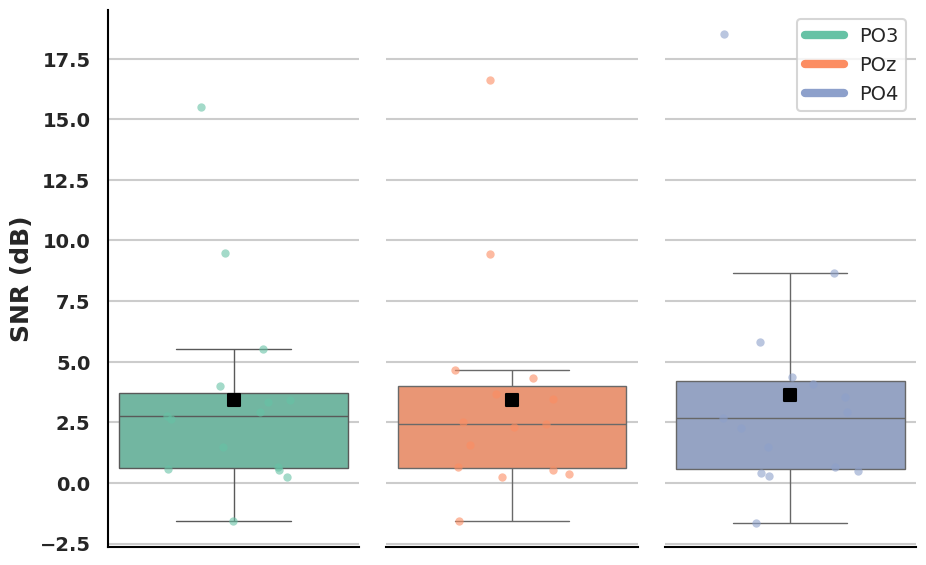

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Style settings for publication-quality figures
sns.set(style="whitegrid", context="talk")

channels = visual_data['Channel'].unique()
n_channels = len(channels)

# Map channel names to colors
palette = dict(zip(channels, sns.color_palette("Set2", n_channels)))

fig, axes = plt.subplots(
    1, n_channels,
    figsize=(3.2 * n_channels, 6),
    sharey=True
)

# Ensure axes is iterable even if n_channels = 1
axes = np.atleast_1d(axes)

for i, ch in enumerate(channels):
    ax = axes[i]

    # Prepare data
    visual_ch = (
        visual_data[visual_data['Channel'] == ch]
        .groupby(['subject', 'Channel'], as_index=False)
        .mean(numeric_only=True)
    )
    
    # Draw boxplot
    sns.boxplot(
        data=visual_ch,
        x='Channel',
        y='SNR_dB',
        ax=ax,
        width=0.5,
        fliersize=0,
        color=palette[ch]
    )
    
    # Overlay strip plot
    sns.stripplot(
        data=visual_ch,
        x='Channel',
        y='SNR_dB',
        ax=ax,
        color=palette[ch],
        size=6,
        alpha=0.6,
        jitter=0.15
    )
    
    # Plot channel mean (optional, can remove if you want)
    mean_val = visual_ch['SNR_dB'].mean()
    ax.scatter(
        0, mean_val,
        color='black',
        marker='s',
        s=80,
        zorder=10
    )

    # Remove titles and x-axis labels
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_xticklabels([''])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if i > 0:
        ax.spines['left'].set_visible(False)

axes[0].set_ylabel('SNR (dB)', fontsize=18, fontweight='bold')

for ax in axes:
    ax.tick_params(axis='both', labelsize=14, width=1.5)
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontweight('bold')
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1.5)

# Create legend using channel names and colors
handles = [plt.Line2D([0], [0], color=palette[ch], lw=6) for ch in channels]
plt.legend(handles, channels, fontsize=14, loc='upper right')

plt.tight_layout()
plt.show()
